# REAL RACING 3 CARS - DATA ANALYSIS

# PART 2 - REVISION 5 - FINAL

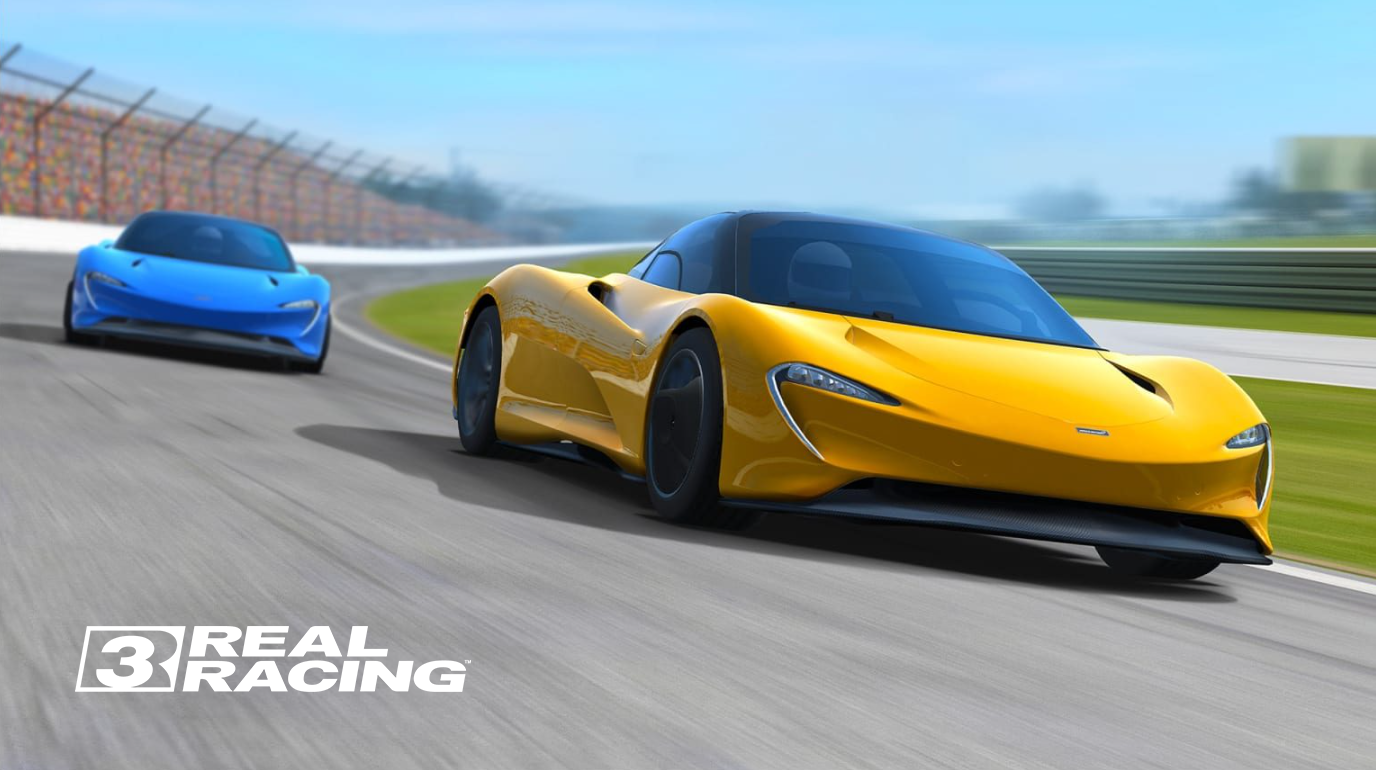

## **Welcome to my 2nd part of data analyses for Real Racing 3 Cars!**

### This is the 5th revision of 2nd part for the analyses, based on **game version 14.0 (FINAL)**.

_As always, let's import all necessary modules and load our vehicle dataset first:_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
rr3_df = pd.read_csv('real_racing_3_cars_v14_0.csv')
pd.set_option('display.max_columns', None)

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Before the start, allow me to check the first and last few lines of the car dataset again...

In [4]:
rr3_df.head(10)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,2,450 Gold,180,1665,Yes,No,No,Yes,No,Yes,Yes,No,No,No
1,Acura,NSX Type S,48.9,307,2.90,32.0,1.10,S,M4,1,600 Gold,180,1812,Yes,No,No,Yes,No,No,No,Yes,No,No
2,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,Yes,No,No,No,No,No,No,No
3,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,Yes,No,No,No,No,No,No,No
4,Acura,ARX-06,84.5,335,2.60,23.2,1.78,R,MR,2,2650000 Mdollar,180,0,Yes,No,Yes,No,No,No,No,Yes,No,Yes
5,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,Yes,No,No,No,No,No,No
6,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,2,200 Gold,180,1415,Yes,No,No,Yes,No,Yes,Yes,No,No,No
7,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes,No,Yes,No,No,No,No
8,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,3,1100 Gold,180,2062,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No
9,Ariel,Atom 3.5,44.5,249,2.70,30.5,1.00,S,RR,2,255000 Rdollar,140,1170,Yes,No,No,Yes,Yes,No,No,No,No,No


In [5]:
rr3_df.tail(10)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
530,Toyota,Camry (Joe Gibbs Racing - 2021),45.4,298,3.45,29.3,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,No,No,No
531,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,No,No,No
532,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,Yes,No,No,No
533,Toyota,Camry TRD (2023),46.7,296,3.34,29.0,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,Yes,No,No,No,No,Yes,No,No
534,Toyota,GR Yaris Rally1 Hybrid,43.2,201,2.70,29.7,1.37,R,F4,2,2250000 Mdollar,260,0,Yes,No,Yes,No,No,No,No,Yes,No,No
535,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,4,950 Gold,325,2192,Yes,No,Yes,Yes,Yes,No,No,No,No,No
536,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,2,300 Gold,180,1377,Yes,No,No,Yes,No,Yes,No,No,No,No
537,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,2,350 Gold,180,1415,Yes,No,No,Yes,No,Yes,No,No,No,No
538,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No
539,Zenvo,Aurora Tur,81.2,451,2.30,31.1,1.45,S,M4,2,900 Gold,180,1997,Yes,Yes,No,Yes,No,No,No,No,Yes,No


**All right, the cars dataset is in perfect condition!** 

## Continuing the Analyses

Many data analyses have been carried out **in the 1st part** such as _selecting some cars one by one,_ _finding the minimum and maximum values w.r.t. their stats,_ _discussions on servicing time,_ _finding out the cars participated across different seasons,_ etc. 

_**OK, I would like to continue for more advanced analysis in order to gain more insights...**_

## Manufacturers

**First of all**, let's learn how many **manufacturers take part** in the final version of Real Racing 3:

In [6]:
len(rr3_df['Manufacturer'].value_counts())

54

Oh, this racing game encompasses **54 manufacturers** in one place, eh? There are lots of them to be honest, and the number was slightly increased once again as compared to the previous revision...

Well, however, before inspecting the manufacturer names, I think there are **at least one or two** of them that do not seem to be counted as car manufacturers at all. Let me investigate the unique names now:

In [7]:
rr3_df['Manufacturer'].unique()

array(['Acura', 'Alfa Romeo', 'Apollo', 'Ariel', 'Aston Martin', 'Audi',
       'Automobili Pininfarina', 'Bentley', 'BMW', 'Brabham', 'Bugatti',
       'Cadillac', 'Caterham', 'Chevrolet', 'Dodge', 'Duqueine',
       'Ferrari', 'Ford', 'Formula 1', 'Formula E', 'Hennessey', 'Holden',
       'Honda', 'Hyundai', 'Jaguar', 'Koenigsegg', 'KTM', 'Lamborghini',
       'Lancia', 'Lexus', 'Ligier', 'Lotus', 'Maserati', 'Mazda',
       'McLaren', 'Mercedes-Benz', 'Mercedes-AMG', 'Mitsubishi Motors',
       'Morgan', 'Nissan', 'Oreca', 'Pagani', 'Peugeot', 'Porsche',
       'Radical', 'Renault', 'Rimac', 'Shelby', 'Spada', 'SRT', 'Subaru',
       'Toyota', 'Volkswagen', 'Zenvo'], dtype=object)

Ah yes! As still valid in the latest version, and as you see from the manufacturer names above, **Formula 1** and **Formula E** should not be classified as individual manufacturers! Of course, in order to not disorganize these related cars, the developers branded them under their motorsport discipline.

If you've ever played the game and inspected the cars from **garage menu**, you should've realized that **this game grouped them together** under those names intentionally. 

Moreover, **Mercedes-Benz** and **Mercedes-AMG** might have been considered to be **two different manufacturers**! Despite this distinction, we should count them as **one whole** manufacturer. That's more logical...

In [8]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)

And below, these are the **Mercedes cars** (ending with _Benz_ or _AMG_, no matter) available to drive in the game:

In [9]:
mercedes = rr3_df[rr3_df['Manufacturer'] == 'Mercedes'].reset_index()
mercedes.set_index(pd.Index(list(range(1,len(mercedes)+1))), inplace=True)
print("There are total of {} Mercedes cars available to drive in Real Racing 3 (v14.0)".format(len(mercedes)))
mercedes.drop(['index', 'Manufacturer'], axis=1, inplace=True)
mercedes

There are total of 14 Mercedes cars available to drive in Real Racing 3 (v14.0)


,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
1,190E 2.5-16 Evolution II,3.5,249,6.90,41.5,1.09,P,FR,4,80 Gold,105,980,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No
2,A 45,30.5,249,4.20,32.3,1.10,P,F4,2,200 Gold,120,1082,Yes,No,No,Yes,No,Yes,No,No,No,No
3,SLS AMG,37.1,317,3.80,30.5,0.98,S,FR,2,260000 Rdollar,140,1177,Yes,No,No,Yes,Yes,No,No,No,No,No
4,SL 65 AMG Black Series,38.3,319,3.80,32.0,1.00,S,FR,5,316000 Rdollar,150,1247,Yes,No,No,Yes,Yes,No,Yes,No,No,No
5,SLS AMG GT3,43.0,299,3.50,30.5,1.09,R,FR,4,140 Gold,180,1415,Yes,No,No,Yes,Yes,No,No,No,No,No
6,C63S,33.3,290,3.80,35.1,1.03,R,FR,1,375 Gold,120,1480,Yes,No,No,Yes,No,Yes,No,No,No,No
7,SLR McLaren 722,48.6,338,3.50,29.3,1.13,S,FR,2,450 Gold,180,1585,Yes,Yes,No,Yes,No,No,No,No,No,No
8,GT3,60.2,328,3.00,27.4,1.30,R,FR,2,650 Gold,180,1665,Yes,Yes,No,Yes,No,No,No,Yes,No,No
9,CLK-LM,56.0,360,3.40,30.5,1.30,R,MR,2,640 Gold,180,1665,Yes,Yes,Yes,No,No,Yes,No,No,No,No
10,AMG CLK GTR Straßenversion,42.3,344,3.67,35.4,1.14,S,MR,2,650 Gold,180,1665,Yes,Yes,No,Yes,No,No,Yes,No,No,No


This should do the trick! With these discussions in mind; that is, excluding **Formula 1, Formula E** and considering **Mercedes** as single one, **there should now actually have 51 different manufacturers**; still a lot and quite nice for a racing game that received updates regularly, up until v14.0...

_I should clarify that there was no new Mercedes cars featured, even more than a year later of this final revision of analyses._

## Manufacturers with 10+ Cars

At this point, we should be aware that some manufacturers are represented with **just one car**, while some are represented by having already **lost of cars** in the roster!

So, the question is which manufacturers do exist in the game with **at least 10 cars**?

_For the proper result, again Formula 1 and Formula E are ignored at all..._

In [10]:
manuCounts = rr3_df['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts[manuCounts >= 10]

Manufacturer
Porsche         54
Chevrolet       35
Ferrari         33
Ford            30
Nissan          28
BMW             23
Aston Martin    22
Lamborghini     22
McLaren         21
Audi            16
Mercedes        14
Toyota          13
Koenigsegg      10
Name: count, dtype: int64

From this output above, Real Racing 3 still favors **Porsche** the most! Up until version 14.0, with **over 54 cars** and no other manufacturers reached that high number!

Then these manufacturers come after: _Chevrolet,_ _Ferrari,_ _Ford_ with **at least 30 cars** of any kind.

Then, _Nissan,_ _BMW,_ _Aston Martin,_ _Lamborghini,_ _McLaren,_ with **at least 20 cars** presented to be purchased and driven.

It seems that **Koenigsegg** joined this list lastly here with the additional new cars periodically in the game, such as **Jesko**, **Jesko Absolut**, **Gemera** and **CC850**.

Note that _Chevrolet,_ _Ford,_ _Nissan,_ and _Toyota_ have **many cars discontinued** due to especially limited-time purchase period of cars from **NASCAR** (spreaded into several seasons) and previously from **Supercar Series**.

But, if you wonder about the car counts of **Formula 1** and **Formula E** individually, let me reveal that:

In [11]:
F1_car_count = int(rr3_df['Manufacturer'].value_counts()['Formula 1'])
FE_car_count = int(rr3_df['Manufacturer'].value_counts()['Formula E'])
print("Total number of Formula 1 Cars:", F1_car_count)
print("Total number of Formula E Cars:", FE_car_count)

Total number of Formula 1 Cars: 64
Total number of Formula E Cars: 44


Yes, **Formula 1** had the highest count across all the manufacturers, surpassing **Porsche**! That's because all cars spanning from **2019 to 2024 season** all made available for purchase, which should bring **at least 60 F1 cars** to be selected here. But, how about the **4 remaining cars?**

Well, these ones must be **F1 Debut Car**, **F1 ESports Challenger** and **Valente**. There is another one which is not a Formula 1 car at all but has a close connection and important duties in real life: **Mercedes-AMG GT R F1 Safety Car**

Speaking of **Formula E**, this could've been the 3rd highest car count, placed between **Porsche** and **Chevrolet**. I can assure you that all the cars inside are completely related to this motorsport. You know, it started with **Season 3** cars, then continued with next seasons; along with newer generations, all cars from all participated teams from **Season 6 to 8**. Then, ended with **Gen3 Show Car** and **Gen3 Championship Car**, represented as a single one with any existing team livery could be applied.

## Manufacturers with 1 Car

Now in contrast, **I'd like to see the names of manufacturers only having one car in the game:**

In [12]:
manu_one_vehicle = (rr3_df['Manufacturer'].value_counts() == 1).values
print(rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle])

['Apollo' 'Duqueine' 'Caterham' 'Brabham' 'Lancia' 'Ligier' 'Peugeot'
 'Morgan' 'Oreca' 'SRT' 'Rimac' 'Subaru' 'Zenvo']


Look here... There appears to be **13 manufacturers with only one cars** available for purchase! Well, what are the details about these?

In [13]:
manu_names_one_v = rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle]
manu_values = rr3_df['Manufacturer'].values
manu_names_one_v_indexes = []
for i in range(manu_values.size):
    if manu_values[i] in manu_names_one_v:
        manu_names_one_v_indexes.append(i)
rr3_df.loc[manu_names_one_v_indexes, :]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
8,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,3,1100 Gold,180,2062,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No
78,Brabham,BT62,68.9,319,2.88,27.4,1.55,R,MR,3,800 Gold,180,1997,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No
90,Caterham,Seven 620 R,49.1,249,2.70,32.0,1.18,S,FR(RHD),3,378500 Rdollar,165,1312,Yes,No,No,Yes,Yes,No,No,No,No,No
135,Duqueine,D08 LMP3,78.5,290,3.35,29.0,1.69,R,MR,2,2750000 Mdollar,180,0,Yes,Yes,Yes,No,No,No,No,No,Yes,No
361,Lancia,LC2,82.5,385,2.80,28.3,1.80,R,MR,1,900 Gold,180,1997,Yes,No,Yes,No,No,Yes,No,No,No,No
365,Ligier,JS P320,78.8,290,3.42,28.0,1.67,R,MR,2,2500000 Mdollar,180,0,Yes,Yes,Yes,No,No,No,No,No,Yes,No
419,Morgan,Plus Six,29.8,267,4.20,34.7,1.10,P,FR,2,300 Gold,180,1415,Yes,Yes,No,Yes,No,No,Yes,No,No,No
448,Oreca,07 LMP2,78.5,322,3.00,25.3,1.74,R,MR,2,2500000 Mdollar,180,0,Yes,No,Yes,No,No,No,No,Yes,No,No
455,Peugeot,9X8 Hypercar,87.3,340,2.65,22.2,1.85,R,M4,2,3000000 Mdollar,180,0,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes
516,Rimac,Nevera,93.2,415,1.74,27.3,1.68,S,M4,2,1100 Gold,180,2090,Yes,Yes,No,Yes,No,No,No,Yes,No,No


**There they are!**

As seen from the table above, we can realize that _Caterham Seven 620 R,_ and _SRT Viper GTS,_ appear in the main career series at reasonable prices (i.e. can be bought with `R$` and never changed even in the final version). The rest are obtainable with `Gold` (ranging from **300 to 1100**) and `M$`!

At this point, it is exciting to see **Rimac**, **Duqueine**, **Ligier**, **Zenvo** and **Peugeot** have made it to the game!

I'd like to say that **Rimac Nevera** is a electrical hypercar which had many world records in the car history; its overwhelmingly high acceleration value and the price cost here is not surprising. **Duqueine D08 LMP3**, as the name suggests, is a racing car from Le Mans Series under **LMP3** category. Similarly, **Ligier LSP320** is another one that raced in Le Mans and/or Endurance series in real life, so it's pleasing to see them in the game and they have their own racing series for competition. Likewise, **Peugeot Hypercar 9X8** appeared here which one of the attractive racing car from LMP1 category and I believe the French manufacturer joined the roster very lately in motorsports side although there could be several others which are road cars and could fit to the game pretty well. Lastly, let's not forget **Zenvo Aurora Tur**, which is another hypercar from Denmark and has its own driving characteristics such as excellent top speed, but below-average braking.

## Discontinued Cars

As we stated above, this game has **several cars discontinued** for sale! Now is the time to reveal the list... _(Yeah, it is too long, but I don't hesitate to print them one by one.)_

In [14]:
not_available = rr3_df[rr3_df['Is Available'] == 'No']
print("Total of {} cars have been discontinued in Real Racing 3:".format(len(not_available)))
not_available.loc[:, ['Manufacturer','Model','PR','Top Speed','Acceleration','Braking','Grip','Class','Series','Price']]

Total of 52 cars have been discontinued in Real Racing 3:


,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Series,Price
95,Chevrolet,SS (NASCAR Academy),25.6,283,4.10,34.7,0.90,R,1,200000 Rdollar
107,Chevrolet,SS (Hendrick Motorsports - 2015),44.1,317,3.61,30.8,1.12,S,1,500 Gold
108,Chevrolet,SS (Stewart-Haas Racing - 2015),44.1,317,3.59,31.1,1.12,S,1,500 Gold
109,Chevrolet,SS (Stewart-Haas Racing - 2016),44.2,317,3.59,30.2,1.10,S,1,500 Gold
110,Chevrolet,SS (Hendrick Motorsports - 2016),44.2,319,3.55,30.5,1.09,S,1,500 Gold
111,Chevrolet,SS (Hendrick Motorsports - 2017),43.5,320,3.50,30.4,1.05,S,1,500 Gold
112,Chevrolet,Camaro ZL1 (2018),43.8,325,3.50,30.2,1.04,R,1,500 Gold
113,Chevrolet,Camaro ZL1 (2019),45.7,325,3.50,29.9,1.09,R,2,500 Gold
114,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),43.8,296,3.47,29.9,1.09,R,1,2150000 Mdollar
115,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),43.8,295,3.45,29.6,1.08,R,1,2150000 Mdollar


My knowledge did not prove me wrong. These all are either from **NASCAR**, or **Supercars**!

Speaking of the details, _Ford Falcon FG X,_ _Holden Commodore VF,_ _Nissan Altima,_ all ranging from **2016 to 2018 models**, were there under **Supercars** series. And the others, you know, are from **NASCAR**. Due to limited licensing to these cars within the game, newcomers can no longer access them! But, you should consider yourself lucky if you already purchased at least one of them, because you can **still race with them** in their own motorsport series.

Some time ago, **Formula E** was another motorsport series that have been removed from purchase in game, due to licensing issues. However, last year, they have been brought back to the game in full roster and all players are able to buy and drive these cars in Formula E-specific tracks (including the unique **Formula E Race** mode where the player must manage the battery level to make it to the finish line). Now, because of the shutdown, they will be gone forever!

Moreover, according to the table above, no discontinued cars were from **P class**; most of them had 1 series for racing. The 2020-2023 Season NASCAR cars were purchasable with **M\$**, previous ones were eligible to buy with **Gold**, even **R\$**.

With this controversy above, this raised another question: In final version 14.0, **how many cars can we see in the game right now?**

In [15]:
availability = {'available': 0, 'not available': 0}
for status in rr3_df['Is Available'].values:
    if status == 'Yes':
        availability['available'] += 1
    else:
        availability['not available'] += 1
for k, v in availability.items():
    print("There are {} cars {} for sale.".format(v, k))

There are 488 cars available for sale.
There are 52 cars not available for sale.


So, the above statements verifies that there are total of **52** cars that were discontinued; these were from **Supercars**, **NASCAR** motorsport series. However, any player who have begun playing the game since the first day (back to year 2013) had the chance to  access all **540** different cars. Believe me or not, this should **a big number for a racing game**, do you agree?

## Manufacturers & Cars After Discontinuation

Anyway, remember the manufacturers list above that exist with at least 10 cars where the discontinued ones were included. This time, if we **exclude all these discontinued cars altogether**, then how does that list get changed?

_Again, not considering Formula 1 and Formula E..._

In [16]:
rr3_df_available = rr3_df[rr3_df['Is Available'] == 'Yes']
manuCounts_avai = rr3_df_available['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E'])
manuCounts_avai[manuCounts_avai >= 10]

Manufacturer
Porsche         54
Ferrari         33
Nissan          25
BMW             23
Aston Martin    22
Lamborghini     22
McLaren         21
Chevrolet       17
Audi            16
Mercedes        14
Ford            13
Koenigsegg      10
Name: count, dtype: int64

Well, **Chevrolet** has seen a significant decrease with the car count, from **35** to **17**!

Likewise, **Ford**'s count has fallen down to **13** (which was **30**)! 

**Nissan** hasn't get affected much as there was only a reduction of **3**. 

Oh, where's **Toyota**? It is certain that now there was only **2** cars left (one of them is **GR Yaris Rally1** from _WRC_ category; the other one is **TS040 Hybrid (2014)**, from _Le Mans Endurance_):

In [17]:
rr3_df_available[rr3_df_available['Manufacturer'] == 'Toyota']

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
534,Toyota,GR Yaris Rally1 Hybrid,43.2,201,2.7,29.7,1.37,R,F4,2,2250000 Mdollar,260,0,Yes,No,Yes,No,No,No,No,Yes,No,No
535,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,4,950 Gold,325,2192,Yes,No,Yes,Yes,Yes,No,No,No,No,No


**As a side note;** in terms of car variations, could Real Racing 3, even with the shutdown, compete with other popular racing games, especially from PC, PlayStation or Xbox consoles, such as _Gran Turismo 7,_ _Assetto Corsa (with mods),_ the latest _Forza Motorsport,_  _Forza Horizon 5,_  _highly-awaited Forza Horizon 6,_ _The Crew Motorfest,_ or _Test Drive Unlimited Solar Crown?_ I'll leave the discussion to you...

## Vehicle Currency Types for Purchase

**OK, let's continue with another aspect:** Let's count the cars according to their **currency types** of their purchase, including the discontinued ones. As we know there are 3 different currencies available: `R$`, `Gold`, `M$`

In [18]:
purchase_type = {'Rdollar': 0, 'Gold': 0, 'Mdollar': 0, 'Unspecified': 0}
for val in rr3_df['Price'].values:
    if 'Rdollar' in str(val):
        purchase_type['Rdollar'] += 1
    elif 'Gold' in str(val):
        purchase_type['Gold'] += 1
    elif 'Mdollar' in str(val):
        purchase_type['Mdollar'] += 1
    else:
        purchase_type['Unspecified'] += 1
print(purchase_type)

{'Rdollar': 82, 'Gold': 288, 'Mdollar': 170, 'Unspecified': 0}


Oh, from this output above, there are lots of cars with purchase type `Gold`! **(over 250; which should be roughly more than half of the total)**

And those with `M$` are accessible from **Motorsport disciplines** only and the current number doesn't seem to be low any more. Let me remind you which ones are utilized with `M$`: _Formula 1,_ _Formula E,_ _GT3,_ _GT4,_ _EuroMaster,_ _NASCAR,_ _WRC,_ _several series from Endurance GT and Prototypes_.

In addition, only **82** cars can be bought with `R$`, much lower than `Gold` and `M$`. If you are a player regularly playing the game, **this number hasn't changed for a very long time!**, even in the final version! This points out that the developers no longer release new cars that are purchaseable with `R$`.

_From the positive side, thankfully, there were **no unspecified** ones, knowing that all prices values have been entered into the dataset._

Finally in this section, the percentage of cars with **Gold purchase-type** is seen below; that is, unsurprisingly, more than a half:

In [19]:
print("Percentage of cars with purchase type Gold --> {:.5}".format(purchase_type['Gold']/rr3_df.shape[0] * 100))

Percentage of cars with purchase type Gold --> 53.333


## More Details on Cars with R$

All right, now I want to make a **sub-dataset** that involves cars that are purchasable with `R$`; and get valuable numerical info about them:

_Here, it is convenient to reset the indexes of that subset; plus, remove the vehicle with unspecified price to avoid errors..._

In [20]:
rr3_df_rdollar = rr3_df[rr3_df['Price'].str.contains('Rdollar')]
rr3_df_rdollar = rr3_df_rdollar.reset_index().drop('index', axis=1)
round(rr3_df_rdollar.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,3.33,128.44,1145.27
std,20.29,45.40,1.14,3.64,0.21,1.39,82.11,482.74
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00
25%,19.65,265.00,3.22,30.50,0.94,2.00,45.00,688.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75
max,89.90,433.00,8.20,48.20,1.90,8.00,320.00,2165.00


**Yeah, this tells us a lot!** But, if you notice, one important thing is missing, **the numbers of car prices**. Since the corresponding column I used for getting this subset was identified with **"object"** datatype in the dataset, thus not a whole integer but string, then I've got to add a new column to include only these numbers and therefore, this column could now be probably considered as **"integer"**.

Let's print these analyses again:

In [21]:
rdollar_values = []
for val in rr3_df_rdollar['Price']:
    rdollar_values.append(int(val.split()[0]))
rr3_df_rdollar['Purchase Value'] = rdollar_values
rr3_df_rdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,3.33,128.44,1145.27,556630.43
std,20.29,45.40,1.14,3.64,0.21,1.39,82.11,482.74,798846.05
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00,22000.00
25%,19.65,265.00,3.22,30.50,0.94,2.00,45.00,688.00,85875.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00,257500.00
75%,50.45,330.00,4.57,33.50,1.20,4.00,178.75,1473.75,590325.00
max,89.90,433.00,8.20,48.20,1.90,8.00,320.00,2165.00,4000000.00


**Done!** _If you agree with me, it is worthwhile to have these purchase values in a separate column (the rightmost) as **integers** after the hassle of fetching and converting operations in data analysis._

Here, for the **Puchase Value** column, there's a huge difference between _min_ and _max_ values, thus **immensely high mean** and **standard deviation** as expected! 


By the way, w.r.t. `R$`, I wonder what the cheapest and the most expensive cars are...

In [22]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5,Purchase Value
43,Hyundai,Veloster Turbo,1.6,225,7.3,41.8,0.85,P,FF,3,22000 Rdollar,5,285,Yes,No,No,Yes,No,No,No,No,No,No,22000


In [23]:
rr3_df_rdollar[rr3_df_rdollar['Purchase Value'] == rr3_df_rdollar['Purchase Value'].max()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5,Purchase Value
7,Audi,R18 E-Tron Quattro (2014),89.9,377,2.57,25.6,1.9,R,M4(RHD),4,4000000 Rdollar,320,2165,Yes,No,Yes,Yes,Yes,No,No,No,No,No,4000000


**Look at these!** Still up until game version 14.0, the cheapest one with `R$` is **Hyundai Veloster Turbo**; on the contrary, the most expensive one is **Audi R18 E-Tron Quattro (2014)**! As you can guess, the former can be raced in _Amateur_ career part, and the latter can only appear in _Endurance Series_ (both in _Legend_ of Road Collection and _Motorsports_).

## More Details on Cars with Gold

Now, I'd like to do everything the same as above for cars with **Gold**:

In [24]:
rr3_df_gold = rr3_df[rr3_df['Price'].str.contains('Gold')]
rr3_df_gold = rr3_df_gold.reset_index().drop('index', axis=1)
gold_values = []
for val in rr3_df_gold['Price']:
    gold_values.append(int(val.split()[0]))
rr3_df_gold['Purchase Value'] = gold_values
rr3_df_gold.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,288.00,288.00,288.00,288.00,288.00,288.00,288.00,288.00,288.00
mean,53.08,318.17,3.50,30.75,1.35,2.38,178.69,1666.89,570.33
std,24.92,53.21,1.17,5.15,0.40,1.29,43.63,342.20,287.64
min,0.10,180.00,1.63,14.30,0.77,1.00,4.00,582.00,40.00
25%,40.42,288.75,2.70,28.00,1.07,1.00,180.00,1415.00,323.75
50%,50.90,320.00,3.20,29.90,1.25,2.00,180.00,1665.00,600.00
75%,74.03,344.50,3.80,32.30,1.60,3.00,180.00,1997.00,792.50
max,130.30,502.00,8.50,48.80,4.00,7.00,325.00,2192.00,1200.00


Again, this tells lots of valueable information! I'll leave the interpretation to you.

However, let me reveal **the cheapest** and **the most expensive** cars together, with purchase type `Gold`:

In [25]:
rr3_df_gold[rr3_df_gold['Purchase Value'].isin([min(rr3_df_gold['Purchase Value']), max(rr3_df_gold['Purchase Value'])])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5,Purchase Value
141,Koenigsegg,Jesko Absolut,88.3,499,2.35,26.2,1.60,S,MR,2,1200 Gold,180,2090,Yes,Yes,No,Yes,No,No,No,Yes,No,Yes,1200
195,McLaren,MP4-X,130.3,402,1.90,14.3,4.00,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No,1200
270,Renault,Clio Cup,5.7,238,5.80,36.3,0.99,S,FF,4,40 Gold,40,630,Yes,No,No,Yes,No,Yes,Yes,No,No,No,40


Here comes the most expensive vehicle with Gold: **McLaren MP4-X** which existed for several years, and the one that later added on this list, **Koenigsegg Jesko Absolut**. I'm not surprised with that as we encountered the former one previously somewhere in the 1st part of analyses, right?

On the other hand, **Renault Clio Cup** is the cheapest with Gold, and should not be hard to bring all upgrades to the max! You could drive this vehicle in some bonus career series within **Pro/AM**, **Season 1** and **Season 2**.

## More Details on Cars with M$

Furthermore, **the same numerical analyses** with `M$` purchase-type cars:

In [26]:
rr3_df_mdollar = rr3_df[rr3_df['Price'].str.contains('Mdollar')]
rr3_df_mdollar = rr3_df_mdollar.reset_index().drop('index', axis=1)
mdollar_values = []
for val in rr3_df_mdollar['Price']:
    mdollar_values.append(int(val.split()[0]))
rr3_df_mdollar['Purchase Value'] = mdollar_values
rr3_df_mdollar.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,170.00,170.00,170.00,170.00,170.00,170.00,170.00,170.0,170.00
mean,77.30,285.74,2.81,23.93,1.97,1.56,181.85,0.0,2048088.24
std,31.36,33.10,0.72,5.84,0.80,0.58,11.98,0.0,466448.27
min,16.10,193.00,2.00,15.50,0.98,1.00,180.00,0.0,0.00
25%,53.12,248.00,2.06,16.80,1.35,1.00,180.00,0.0,2000000.00
50%,63.65,296.00,2.96,26.50,1.56,2.00,180.00,0.0,2150000.00
75%,115.60,312.00,3.35,29.22,2.94,2.00,180.00,0.0,2287500.00
max,116.00,348.00,5.80,34.10,3.06,3.00,260.00,0.0,3000000.00


If you take a look at the table above, you'll recogize that the minimum, 25%, 50%, and 75% values of **Service Time** for `M$` purchase-type cars always appear as **180 minutes**!

Likewise, their **Service Cost** is always **FREE** (I mean, always 'zero').

Well, strangely, the **minimum purchase value** is zero. Is this an error or intentionally determined?

In [27]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].min()]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5,Purchase Value
38,Formula 1,F1 Debut Car,110.3,306,2.15,18.3,3.0,R,MR,1,0 Mdollar,180,0,Yes,No,Yes,No,No,No,No,No,No,No,0


Ah, that's right! The **F1 Debut Car** is FREE to get; enabling you to jump into the Formula 1 action in no time, right?

And, I suppose there should exist **more than one car** that are purchased with the maximum `M$` value...

In [28]:
rr3_df_mdollar[rr3_df_mdollar['Purchase Value'] == rr3_df_mdollar['Purchase Value'].max()] \
    [['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Purchase Value']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Purchase Value
154,Peugeot,9X8 Hypercar,87.3,340,2.65,22.2,1.85,3000000


**No, it's not!** Up until version 14.0, there is only one car **Peugeot 9X8 Hypercar**, which has raised the bar to **3 million M$**!

Previously, the max price value of `M$` for any car was **2.8 million**, which belonged to **Radical SR10 XXR**. 

If I enlarge the list to the top 10, what are the other cars with very high amount `M$` price values?

In [29]:
rr3_df_mdollar.sort_values('Purchase Value', ascending=False)[['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Purchase Value']][:10]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Purchase Value
154,Peugeot,9X8 Hypercar,87.3,340,2.65,22.2,1.85,3000000
163,Radical,SR10 XXR,91.0,290,2.40,28.6,2.40,2800000
27,Duqueine,D08 LMP3,78.5,290,3.35,29.0,1.69,2750000
29,Ferrari,499P,90.9,348,2.55,21.9,1.90,2750000
0,Acura,ARX-06,84.5,335,2.60,23.2,1.78,2650000
12,BMW,M Hybrid V8,84.2,332,2.70,22.6,1.80,2650000
162,Porsche,963 LMDh,85.4,333,2.65,21.9,1.80,2650000
153,Oreca,07 LMP2,78.5,322,3.00,25.3,1.74,2500000
56,Formula 1,McLaren F1 Team MCL35,115.8,312,2.06,16.5,3.04,2500000
74,Formula 1,Mercedes-AMG Petronas Formula One Team W13,115.9,311,2.03,16.5,2.94,2500000


**Yeah, this explains what I needed.** After **Peugeot** and **Radical**, there are **Duqueine D08 LMP3** and **Ferrari 499P** (both from _Endurance Prototypes_ series) costing 2.75 million **M\$**. Then, other Endurance LMP cars altogether from the last few years: **Acura ARX-06**, **BMW M Byhrid V8** and **Porsche 963 LMDh**, costing 2.65 million **M\$**. Then, it is **Oreca 07 LMP2** and many **Formula 1** cars from 2020-2022 seasons, costing 2.5 million **M\$**.

## Formula 1 Cars for Every Season

As we know that all Formula 1 cars are still available to buy and drive through iconic circuits in the game since **2019 Season**, progressed up to **2024 Season** (in other words, we have access to these for **six consecutive seasons**). However, what makes the players disappointed is that **there was nothing about 2025 Season of Formula 1 cars** and it won't happen at any time because of the game becoming sunset!

Despite this situation, it is very convenient to list all the cars within the individual season. Well, it's your decision which F1 team(s) you'll be driving for with your favourite drivers before the game shuts down, by looking at the specific stats for each one below:

### 2019 Season

In [30]:
rr3_f1 = rr3_df[rr3_df['Manufacturer'] == 'Formula 1']
rr3_f1.loc[201:210, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
201,Renault F1 Team R.S. 19,115.7,314,2.02,17.7,3.01,R,MR,2,2000000 Mdollar
202,Red Bull Racing RB15,115.8,311,2.05,17.4,3.05,R,MR,2,2000000 Mdollar
203,Toro Rosso STR14,115.7,311,2.07,17.4,3.02,R,MR,2,2000000 Mdollar
204,Scuderia Ferrari SF90,115.8,314,2.01,17.1,3.04,R,MR,2,2000000 Mdollar
205,Mercedes-AMG Petronas Motorsport F1 W10 EQ Power+,115.8,309,2.06,16.8,3.06,R,MR,2,2000000 Mdollar
206,Haas F1 Team VF-19,115.6,312,2.02,17.4,3.01,R,MR,2,2000000 Mdollar
207,Alfa Romeo Racing C38,115.6,312,2.02,17.1,3.02,R,MR,2,2000000 Mdollar
208,McLaren F1 Team MCL34,115.7,314,2.02,16.8,3.04,R,MR,2,2000000 Mdollar
209,SPScore Racing Point F1 Team RP19,115.6,311,2.06,17.4,3.02,R,MR,2,2000000 Mdollar
210,Rokit Williams Racing FW42,115.6,309,2.07,17.7,3.01,R,MR,2,2000000 Mdollar


### 2020 Season

In [31]:
rr3_f1.loc[211:220, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
211,Renault DP World F1 Team R.S. 20,115.8,312,2.07,16.5,3.03,R,MR,2,2500000 Mdollar
212,Aston Martin Red Bull Racing RB16,115.9,311,2.06,16.5,3.05,R,MR,2,2500000 Mdollar
213,Scuderia AlphaTauri Honda AT01,115.6,312,2.08,17.4,3.02,R,MR,2,2500000 Mdollar
214,Scuderia Ferrari SF1000,115.8,311,2.06,16.5,3.04,R,MR,2,2500000 Mdollar
215,Mercedes-AMG Petronas Formula One Team W11 EQ ...,116.0,309,2.03,16.2,3.05,R,MR,2,2500000 Mdollar
216,Haas F1 Team VF-20,115.6,312,2.07,17.4,3.01,R,MR,2,2500000 Mdollar
217,Alfa Romeo Racing Orlen C39,115.6,315,2.10,17.7,3.01,R,MR,2,2500000 Mdollar
218,McLaren F1 Team MCL35,115.8,312,2.06,16.5,3.04,R,MR,2,2500000 Mdollar
219,BWT Racing Point F1 Team RP20,115.8,311,2.05,16.5,3.04,R,MR,2,2500000 Mdollar
220,Williams Racing FW43,115.6,314,2.10,17.4,3.01,R,MR,2,2500000 Mdollar


### 2021 Season

In [32]:
rr3_f1.loc[222:231, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
222,Alpine F1 Team A521,115.7,312,2.07,16.5,3.02,R,MR,2,2500000 Mdollar
223,Red Bull Racing Honda RB16B,115.9,312,2.05,16.5,3.04,R,MR,2,2500000 Mdollar
224,Scuderia AlphaTauri Honda AT02,115.7,312,2.05,16.8,3.02,R,MR,2,2500000 Mdollar
225,Scuderia Ferrari SF21,115.7,311,2.06,16.8,3.03,R,MR,2,2500000 Mdollar
226,Mercedes-AMG Petronas Formula One Team W12,115.9,311,2.03,16.2,3.04,R,MR,2,2500000 Mdollar
227,Uralkali Haas F1 Team VF-21,115.5,309,2.10,17.1,3.00,R,MR,2,2500000 Mdollar
228,Alfa Romeo Racing Orlen C41,115.5,314,2.06,17.1,3.00,R,MR,2,2500000 Mdollar
229,McLaren F1 Team MCL35M,115.7,312,2.06,16.5,3.03,R,MR,2,2500000 Mdollar
230,Aston Martin Cognizant Formula One Team AMR21,115.6,312,2.05,16.5,3.01,R,MR,2,2500000 Mdollar
231,Williams Racing FW43B,115.5,314,2.09,17.1,3.00,R,MR,2,2500000 Mdollar


### 2022 Season

In [33]:
rr3_f1.loc[232:241, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
232,BWT Alpine F1 Team A522,115.7,312,2.07,16.5,2.92,R,MR,2,2500000 Mdollar
233,Oracle Red Bull Racing RB18,115.9,314,2.04,16.5,2.93,R,MR,2,2500000 Mdollar
234,Scuderia AlphaTauri AT03,115.7,312,2.05,16.8,2.92,R,MR,2,2500000 Mdollar
235,Scuderia Ferrari F1-75,115.9,311,2.04,16.2,2.94,R,MR,2,2500000 Mdollar
236,Mercedes-AMG Petronas Formula One Team W13,115.9,311,2.03,16.5,2.94,R,MR,2,2500000 Mdollar
237,Haas F1 Team VF-22,115.5,309,2.10,17.1,2.90,R,MR,2,2500000 Mdollar
238,Alfa Romeo Racing Orlen C42,115.5,314,2.05,16.8,2.91,R,MR,2,2500000 Mdollar
239,McLaren F1 Team MCL36,115.7,312,2.05,16.5,2.93,R,MR,2,2500000 Mdollar
240,Aston Martin Aramco Cognizant Formula One Team...,115.6,312,2.05,16.5,2.91,R,MR,2,2500000 Mdollar
241,Williams Racing FW44,115.5,314,2.09,17.1,2.90,R,MR,2,2500000 Mdollar


### 2023 Season

In [34]:
rr3_f1.loc[242:251, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
242,BWT Alpine F1 Team A523,115.7,314,2.06,16.2,2.93,R,MR,2,1700000 Mdollar
243,Oracle Red Bull Racing RB19,115.9,317,2.02,16.2,2.94,R,MR,2,1700000 Mdollar
244,Scuderia AlphaTauri AT04,115.7,314,2.04,16.5,2.93,R,MR,2,1700000 Mdollar
245,Scuderia Ferrari SF-23,115.9,311,2.04,15.8,2.95,R,MR,2,1700000 Mdollar
246,Mercedes-AMG Petronas Formula One Team W14,115.9,312,2.03,16.2,2.96,R,MR,2,1700000 Mdollar
247,MoneyGram Haas F1 Team VF-23,115.5,312,2.08,16.5,2.91,R,MR,2,1700000 Mdollar
248,Alfa Romeo Racing Stake C43,115.5,315,2.04,16.5,2.92,R,MR,2,1700000 Mdollar
249,McLaren F1 Team MCL60,115.7,314,2.05,16.2,2.94,R,MR,2,1700000 Mdollar
250,Aston Martin Cognizant Formula One Team AMR23,115.8,314,2.01,16.2,2.94,R,MR,2,1700000 Mdollar
251,Williams Racing FW45,115.5,315,2.08,16.8,2.91,R,MR,2,1700000 Mdollar


### 2024 Season

In [35]:
rr3_f1.loc[252:261, 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
252,BWT Alpine F1 Team A524,115.6,315,2.05,16.2,2.94,R,MR,2,2000000 Mdollar
253,Oracle Red Bull Racing RB20,115.9,320,2.00,15.5,2.95,R,MR,2,2000000 Mdollar
254,Visa Cash App RB Formula One Team VCARB 01,115.7,314,2.02,16.2,2.93,R,MR,2,2000000 Mdollar
255,Scuderia Ferrari SF-24,115.8,317,2.02,15.8,2.95,R,MR,2,2000000 Mdollar
256,Mercedes-AMG Petronas Formula One Team W15,115.8,317,2.04,16.5,2.96,R,MR,2,2000000 Mdollar
257,MoneyGram Haas F1 Team VF-24,115.5,314,2.04,16.5,2.93,R,MR,2,2000000 Mdollar
258,Kick Sauber F1 Team C44,115.5,314,2.04,16.5,2.92,R,MR,2,2000000 Mdollar
259,McLaren F1 Team MCL38,115.8,319,2.04,15.5,2.95,R,MR,2,2000000 Mdollar
260,Aston Martin Aramco Cognizant Formula One Team...,115.7,315,2.00,15.8,2.94,R,MR,2,2000000 Mdollar
261,Williams Racing FW46,115.5,315,2.05,16.5,2.92,R,MR,2,2000000 Mdollar


Besides, as discussed in this analysis above, there are **4** additional cars in Formula 1 category, that are worth inspecting.

Three of them are playable in **F1 Exhibition** and the other one is not actually an F1 car, instead a **Safety Car**.

In [36]:
rr3_f1.loc[[199,200,221,262], 'Model':'Price']

,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
199,Mercedes-AMG GT R F1 Safety Car,43.3,317,3.60,29.3,1.05,R,FR,1,500000 Mdollar
200,F1 Debut Car,110.3,306,2.15,18.3,3.00,R,MR,1,0 Mdollar
221,R3 ESports Challenger,110.3,306,2.15,18.3,3.00,R,MR,1,2000000 Mdollar
262,Valente,115.7,312,2.02,16.2,2.93,R,MR,3,2000000 Mdollar


## Specific Counts of Other Columns

Next, let's perform **grouping some values** through features and get any other remarkable knowledge for us all! Let's start with **car classes**:

In [37]:
rr3_df.groupby('Class')['Model'].count()

Class
P     85
R    289
S    166
Name: Model, dtype: int64

This information shows us that only **85** cars are classified as **P (Product)**, then **166** of them are **S (Super)**; and, it is clear to see the vehicle roster encompasses **R (Race)**-classed ones the most, which is **289**. Could that be because of involving many motorsport series and some important career series?

Next, how about **the drive types**?

In [38]:
drive_types = rr3_df.groupby('Type')['Model'].count()
types_merged = {}
for i in range(len(drive_types)):
    dt = drive_types.index[i][:2]
    if dt in types_merged:
        types_merged[dt] += drive_types[i]
    else:
        types_merged[dt] = drive_types[i]
for k, v in types_merged.items():
    print("{:3} -> {:4}".format(k, v))

F4  ->   26
FF  ->   12
FR  ->  172
M4  ->   54
MR  ->  235
R4  ->    3
RR  ->   38


_Here, data wrangling actions were applied in order to consolidate the count values into their proper drive types and it is better to show them in a much cleaner format like above._

From the output above, even in the final version of the game, cars with **MR** drive types (i.e. **Mid engine, Real-wheel drive**) are the most common, then **FR** comes afterwards. Well, it is extremely rare to see cars with **R4** drive types. 

Well, I really wonder which cars are specified with **R4** type...

In [39]:
rr3_df[rr3_df['Type'] == 'R4'].loc[:,'Manufacturer':'Price'] 

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
140,Ferrari,FF,38.3,335,3.7,33.5,1.00,S,R4,2,585000 Rdollar
458,Porsche,911 Turbo (2009),43.8,311,3.4,30.5,1.05,S,R4,5,148000 Rdollar
488,Porsche,911 Turbo S,79.2,330,2.6,26.8,1.40,S,R4,4,725 Gold


Oh, I remember these **three** cars! Once upon a time, I bought and drove the first two in several events. Why didn't I notice that in advance!? About **Porsche 911 Turbo S**, that was another addition in this type many updates ago, but I only had the chance to drive in the limited-time series, hence still did not buy it yet and I must act quickly to get into the seat of this beautiful cars before the shutdown...

## Career Series Availability Numbers

Lastly, let's analyze the breakdown of count of career series availability among all cars. **Here, I'd like to show this info with a visualization: bar chart**

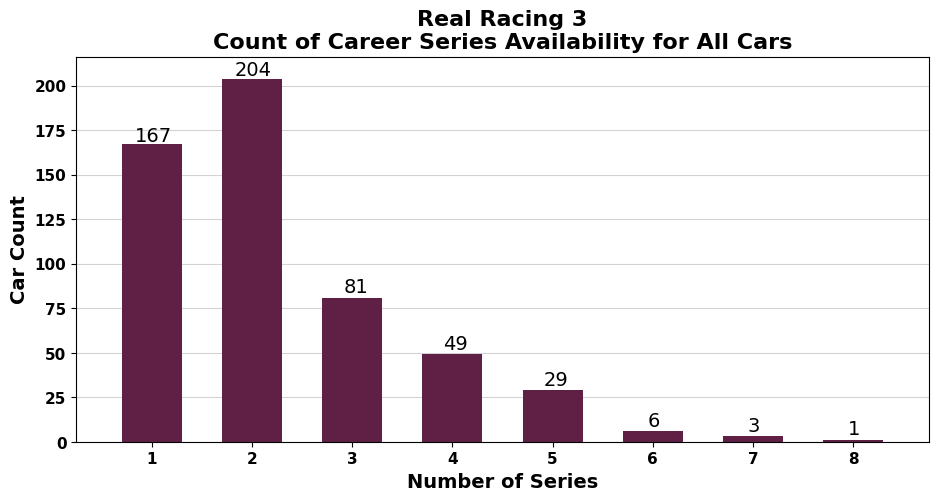

In [40]:
series_count = rr3_df.groupby('Series')['Model'].count()
plt.figure(figsize=(11,5))
plt.bar(range(1,9), series_count, color='#602046', width=0.6, zorder=2)
plt.title('Real Racing 3\nCount of Career Series Availability for All Cars', fontsize=16, fontweight='bold')
plt.xlabel('Number of Series', fontsize=14, fontweight='bold')
plt.ylabel('Car Count', fontsize=14, fontweight='bold')
for i in range(1,len(series_count)+1):
    if series_count[i] >= 100:   plt.text(i-0.17, series_count[i]+2, "{:3}".format(series_count[i]), fontsize=14)
    elif series_count[i] >= 10:   plt.text(i-0.09, series_count[i]+3, "{:2}".format(series_count[i]), fontsize=14)
    else:   plt.text(i-0.05, series_count[i]+3, series_count[i], fontsize=14)
plt.grid(axis='y', color='#d3d3d3', zorder=1)
plt.margins(0.06)
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.show()

With many settings for full proper visualization in the figure, here's the **bar chart**!

We can claim that **more than 350** cars can be driven in only **1 or 2 career series**. Do you think they are worth buying and upgrading? Hmmm, maybe, if they also have their own **exclusive events**. By the way, the rest looks like more preferable to own and upgrade, though.

Ah, if you ever wonder which vehicle has **6**, **7** or **8 different career series** for driving, let me reveal them for you!

In [41]:
rr3_df[rr3_df['Series'] >= 6]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Motorsports,In Road Collection,In Main Career,In Season 1,In Season 2,In Season 3,In Season 4,In Season 5
35,Audi,R8 LMS Ultra,50.5,315,3.5,30.8,1.30,R,MR,7,366300 Rdollar,160,1302,Yes,Yes,No,Yes,Yes,No,No,No,No,No
164,Ferrari,LaFerrari,66.0,349,2.9,27.7,1.40,S,MR,7,790 Gold,295,2037,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No
330,Koenigsegg,Agera R,78.3,439,2.9,29.6,1.60,S,MR,6,800 Gold,300,2062,Yes,No,No,Yes,Yes,Yes,No,No,No,No
342,Lamborghini,Huracán LP610-4,50.7,325,3.2,30.8,1.17,S,M4,6,450 Gold,90,1377,Yes,No,No,Yes,No,No,Yes,No,No,No
345,Lamborghini,Aventador LP700-4,50.9,349,2.9,30.5,1.06,S,M4,6,597700 Rdollar,195,1480,Yes,No,No,Yes,Yes,No,No,No,No,No
382,McLaren,MP4-12C,48.3,330,2.9,30.5,1.06,S,MR,6,65 Gold,140,1192,Yes,No,No,Yes,Yes,No,No,No,No,No
421,Nissan,Skyline GT-R V-Spec (R34),2.5,257,5.8,36.6,0.88,P,FR(RHD),6,35600 Rdollar,9,460,Yes,Yes,No,Yes,Yes,No,No,No,No,No
451,Pagani,Zonda R,74.0,351,2.7,29.3,1.62,S,MR,7,400 Gold,280,1965,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No
477,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.40,S,M4,8,845000 Rdollar,215,1605,Yes,No,No,Yes,Yes,No,Yes,No,No,No
478,Porsche,918 Spyder Weissach Package,70.4,344,2.5,28.7,1.45,S,MR,6,700 Gold,225,1647,Yes,No,No,Yes,No,No,No,No,Yes,No


As expected, we should see a total of **10 cars** with such high number of available career series.

Even in the final version, **Porsche 918 Spyder Concept** still holds the highest number, which is 8. Its sibling **918 Spyder Weissach Package** joined this list with **6**. But, their common thing is that they don't have their own **exclusive series**.

Here, **Nissan Skyline GT-R V-Spec (R34)** should be a smart choice as it is cheap to buy, has significantly less servicing time and has its own exclusive series!

The other optimal choices should be **Audi R8 LMS Ultra**, **Lamborghini Aventador LP700-4**, **McLaren MP4-12C** and **Pagani Zonda R**.

## **OK, folks! That's enough for 2nd part of my Real Racing 3 data analysis!**

**I believe we have gained more knowledge on cars available in this game and hope that you enjoyed a lot!**

**There will be lots of visualizations through the next part of my analysis. You know any graph could explain a thousand words than the statements here, right?** 

# **Stay tuned and keep racing until the shutdown!**

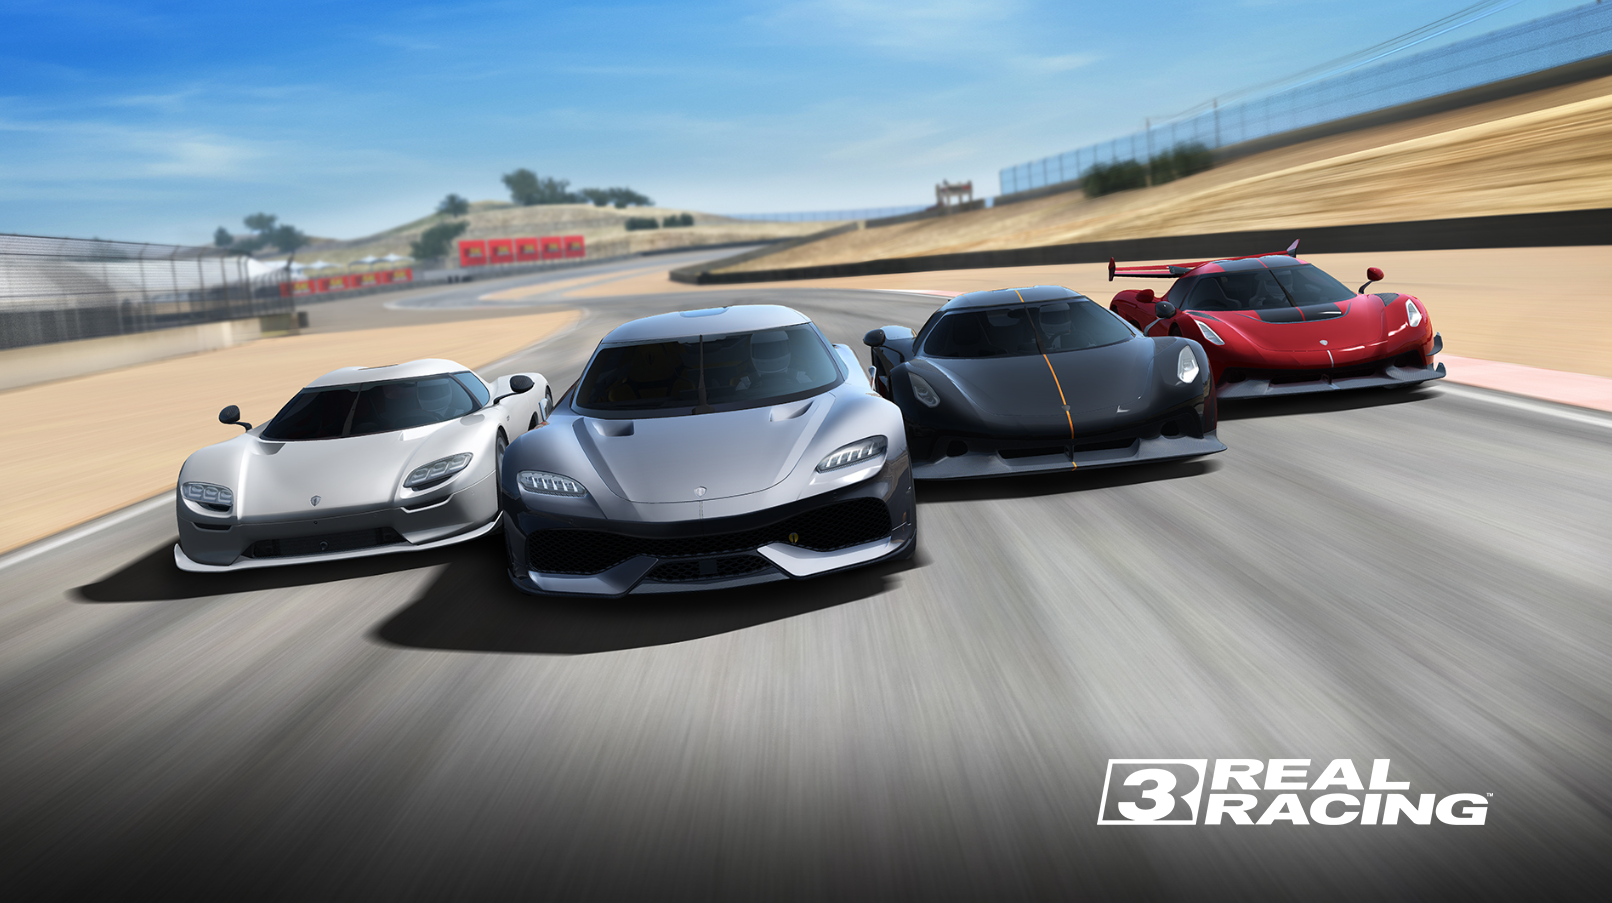